In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import glob
import pandas as pd

# 🔹 Path to folder containing all stock CSVs
folder_path = "/content/drive/MyDrive/NSE"   # change to your folder

# 🔹 Get list of all CSV files
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

In [3]:
str=csv_files[13]
s=str[52:]
print (str)
clean_name = s.replace("-EQ_ONE_DAY.csv", "")
print(clean_name)

/content/drive/MyDrive/NSE/angelone_historical3_NSE_EGOLD-EQ_ONE_DAY.csv
EGOLD


In [3]:
import os
import glob
import pandas as pd

# 🔹 Path to folder containing all stock CSVs
folder_path = "/content/drive/MyDrive/NSE"   # change to your folder

# 🔹 Get list of all CSV files
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 🔹 Empty list to hold DataFrames
df_list = []

for file in csv_files:
    s=file[52:]
    stock_id = s.replace("-EQ_ONE_DAY.csv", "")

    # Read CSV
    df = pd.read_csv(file)

    # Add stock_id column
    df["stock_id"] = stock_id
    print(stock_id)
    # Append to list
    df_list.append(df)

# 🔹 Combine all into one DataFrame
all_stocks_df = pd.concat(df_list, ignore_index=True)

# 🔹 Sort by stock_id + date (important for time series)
all_stocks_df["date"] = pd.to_datetime(all_stocks_df["date"])
all_stocks_df = all_stocks_df.sort_values(by=["stock_id", "date"])

print("Shape of combined dataset:", all_stocks_df.shape)
print(all_stocks_df.head())


ADFFOODS
MUFIN
LMW
CELLO
HONASA
AMNPLST
LGHL
RADIOCITY
ESAFSFB
MASFIN-EQ_ONE_DAY (1).csv
MASFIN
DMART
ORISSAMINE
EGOLD
DEEPAKNTR
LICHSGFIN
AHLADA
SASTASUNDR
INTENTECH
INFRABEES
CPCAP
TASTYBITE
UNIDT
GREENPOWER
RAMKY
ASKAUTOLTD
ARIHANTSUP
CANTABIL
AKSHARCHEM
LUMAXIND
ASHOKA
WABAG
BEDMUTHA
URJA
CLEDUCATE
JWL
OBEROIRLTY
IREDA
ESILVER
LYKALABS
IRFC
TATATECH
ASHAPURMIN
PRESTIGE
GANDHAR
M&M
FEDFINA
SHANKARA
RESPONIND
CGCL
FLAIR
COALINDIA
IOLCP
RAMCOCEM
INDIGOPNTS
WIPL
CHENNPETRO
PRUDMOULI
AXISGOLD
GRAVITA
BBNPPGOLD
DOMS
INDIASHLTR
HOMEFIRST
DOLLAR
ASHIMASYN
INOXINDIA
SUPERHOUSE
PENIND
JINDWORLD
SCHAND
VTL
RPPINFRA
JAMNAAUTO
SURAJEST
MOTISONS
HUDCO
MOIL
MUTHOOTMF
MAHSCOOTER
HAPPYFORGE
RBZJEWEL
MUFTI
PSPPROJECT
MAHSEAMLES
AZAD
KIRLOSENG
RKDL
SUNCLAY
PSB
FMNL
INNOVACAP
MANGLMCEM
STOVEKRAFT
SURANASOL
STARCEMENT
SHEKHAWATI
BFINVEST
KICL
MARALOVER
TEJASNET
ERIS
CDSL
GTPL
ASHOKLEY
AUBANK
MASTEK-EQ_ONE_DAY (1).csv
MASTEK
DIGIDRIVE
AXISNIFTY
LOWVOLIETF
SUMMITSEC
JYOTICNC
DYNPRO
STEELXIND
SALASAR
PALA

In [4]:
df=all_stocks_df

In [6]:
path= "/content/drive/MyDrive/NSE"
i=0
for file in os.listdir(path):
  df=pd.read_csv(os.path.join(path,file))
  preprocess(df)


NameError: name 'preprocess' is not defined

In [7]:
df=pd.read_csv("/content/drive/MyDrive/NSE/angelone_historical3_NSE_20MICRONS-EQ_ONE_DAY.csv")
df.head()

,date,open,high,low,close,Total traded quantity (volume),SMMA_5,SMMA_20,SMMA_40,SMMA_150,SMMA_diff_5_20,SMMA_diff_20_40,SMMA_diff_40_150
0,2014-09-01,34.3,35.35,32.05,34.50,53094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-02,34.8,34.85,33.50,33.70,48441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-03,34.9,34.90,32.50,32.85,53483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-04,33.0,33.45,31.00,31.95,94219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-05,32.5,32.75,31.55,31.95,109866,32.99,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(df)

3752966

In [6]:
# check total nulls in each column
print(df.isnull().sum())


date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
Total traded quantity (volume)         0
SMMA_5                              8532
SMMA_20                            40430
SMMA_40                            82649
SMMA_150                          310351
SMMA_diff_5_20                     40430
SMMA_diff_20_40                    82649
SMMA_diff_40_150                  310351
stock_id                               0
dtype: int64


In [7]:
indicator_cols = [
    'SMMA_5', 'SMMA_20', 'SMMA_40', 'SMMA_150',
    'SMMA_diff_5_20', 'SMMA_diff_20_40', 'SMMA_diff_40_150'
]

# First forward fill (propagate last valid value downwards)
df[indicator_cols] = df[indicator_cols].ffill()

# Then backward fill (fill remaining NaNs at the top with next valid value)
df[indicator_cols] = df[indicator_cols].bfill()

# Check if any nulls remain
print(df[indicator_cols].isnull().sum())

SMMA_5              0
SMMA_20             0
SMMA_40             0
SMMA_150            0
SMMA_diff_5_20      0
SMMA_diff_20_40     0
SMMA_diff_40_150    0
dtype: int64


In [8]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

In [9]:
df = df.drop_duplicates()


In [10]:
# Create Target column (next day's close)
df['target'] = df['close'].shift(-1)

# Calculate Target Return
df['Target_Return'] = (df['target'] - df['close']) / df['close']

# Define Target Movement (1 = up, -1 = down, 0 = no change)
df['Target_Movement'] = df['Target_Return'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df["Target_Movement"] = df["Target_Movement"].map({-1: 0, 0: 1, 1: 2})
# Last row will have NaN since there's no "next day"
print(df.head())

              date    open    high     low   close  \
3607764 2014-07-15   22.07   22.38   21.83   21.98   
1598098 2014-07-15   71.70   73.35   69.40   72.40   
1651812 2014-07-15  244.57  245.58  238.04  244.39   
1621055 2014-07-15  612.50  639.00  612.50  621.35   
3726780 2014-07-15   92.40   94.50   92.00   93.25   

         Total traded quantity (volume)       SMMA_5      SMMA_20  \
3607764                           57209    21.888364    22.520851   
1598098                         3268142     1.542674     1.596860   
1651812                         1958739   902.536906   929.639367   
1621055                             110  1756.813636  1726.298163   
3726780                          277179    62.601271    65.474882   

             SMMA_40     SMMA_150  SMMA_diff_5_20  SMMA_diff_20_40  \
3607764    23.347679    28.258323       -0.632487        -0.826828   
1598098     1.618020     1.909342       -0.054186        -0.021160   
1651812   938.478024   999.408980      -27.102461 

In [11]:
df = df.drop(df.index[-1])
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
Total traded quantity (volume),0
SMMA_5,0
SMMA_20,0
SMMA_40,0
SMMA_150,0


Using IncrementalPCA (large dataset).
Explained Variance Ratio (Incremental PCA): approx not available directly
Fitting UMAP on 20000 samples (this may take a while)...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


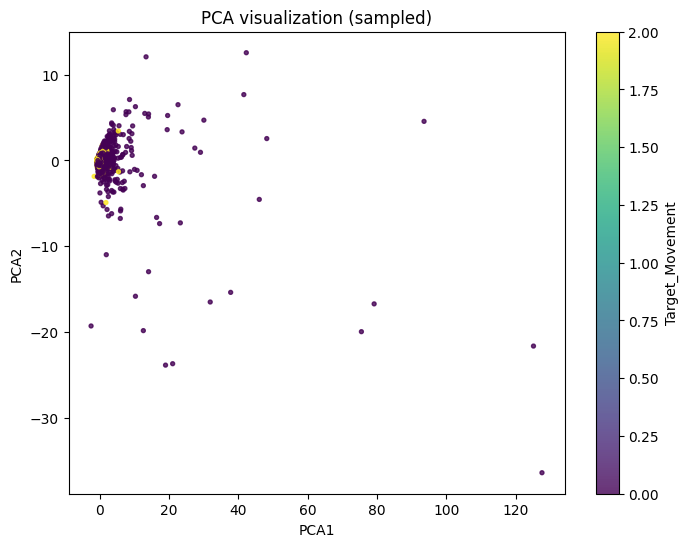

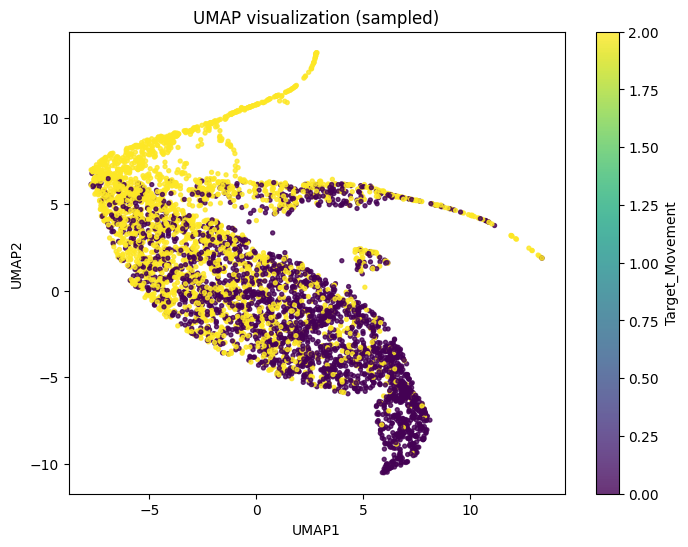

In [12]:
import numpy as np
import pandas as pd
import gc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA, IncrementalPCA
import umap.umap_ as umap
import matplotlib.pyplot as plt

# ---------------------------
# Config
# ---------------------------
PCA_COMPONENTS = 3
UMAP_COMPONENTS = 2
UMAP_SAMPLE_SIZE = 20000       # fit UMAP on this many rows max
PLOT_SAMPLE = 5000             # plot only this many points to avoid renderer overload
IPCA_BATCH_SIZE = 5000         # batch size for IncrementalPCA (tune to memory)

# ---------------------------
# Prepare numeric feature matrix (drop non-numeric / label cols)
# ---------------------------
# Make a copy to avoid modifying original df accidentally
_work = df.copy()

# Ensure date and id/label columns are removed
cols_to_drop = ["date", "target", "Target_Movement", "stock_id"]
cols_to_drop = [c for c in cols_to_drop if c in _work.columns]
X_df = _work.drop(columns=cols_to_drop)

# Keep only numeric columns (safe)
X_df = X_df.select_dtypes(include=[np.number])

# ---------------------------
# Impute missing values and remove zero-variance columns
# ---------------------------
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X_df)   # numpy array

# Remove zero-variance features (VarianceThreshold)
vt = VarianceThreshold(threshold=0.0)
X_non_const = vt.fit_transform(X_imputed)

# ---------------------------
# Scale features
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_non_const)

# Free memory
del X_imputed
gc.collect()

# ---------------------------
# PCA: use IncrementalPCA if dataset is large
# ---------------------------
n_samples = X_scaled.shape[0]
if n_samples > 50000:
    print("Using IncrementalPCA (large dataset).")
    ipca = IncrementalPCA(n_components=PCA_COMPONENTS, batch_size=IPCA_BATCH_SIZE)
    X_pca = ipca.fit_transform(X_scaled)
else:
    print("Using standard PCA.")
    pca = PCA(n_components=PCA_COMPONENTS)
    X_pca = pca.fit_transform(X_scaled)

# Build PCA dataframe columns names
pca_cols = [f"PCA{i+1}" for i in range(PCA_COMPONENTS)]
df_pca = pd.DataFrame(X_pca, columns=pca_cols, index=_work.index)
_work = pd.concat([_work, df_pca], axis=1)

# If you want explained variance (only available for standard PCA)
try:
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
except Exception:
    try:
        print("Explained Variance Ratio (Incremental PCA): approx not available directly")
    except:
        pass

# ---------------------------
# UMAP: fit on a sample, then transform whole dataset
# ---------------------------
# Choose sample indices (deterministic)
sample_size = min(UMAP_SAMPLE_SIZE, n_samples)
rng = np.random.RandomState(42)
sample_idx = rng.choice(n_samples, size=sample_size, replace=False)

# Fit UMAP on sampled scaled data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=UMAP_COMPONENTS, random_state=42)
print(f"Fitting UMAP on {sample_size} samples (this may take a while)...")
umap_model.fit(X_scaled[sample_idx])

# Transform the full dataset (faster + lower memory than fit on whole)
X_umap = umap_model.transform(X_scaled)
umap_cols = [f"UMAP{i+1}" for i in range(UMAP_COMPONENTS)]
df_umap = pd.DataFrame(X_umap, columns=umap_cols, index=_work.index)
_work = pd.concat([_work, df_umap], axis=1)

# Free memory
del X_scaled, X_pca, X_umap
gc.collect()

# ---------------------------
# Plot (sampled for safety)
# ---------------------------
plot_sample = min(PLOT_SAMPLE, n_samples)
plot_idx = rng.choice(n_samples, size=plot_sample, replace=False)

plt.figure(figsize=(8,6))
sc = plt.scatter(_work.loc[_work.index[plot_idx], "PCA1"],
                 _work.loc[_work.index[plot_idx], "PCA2"],
                 c=_work.loc[_work.index[plot_idx], "Target_Movement"],
                 cmap="viridis", s=8, alpha=0.8)
plt.colorbar(sc, label="Target_Movement")
plt.xlabel("PCA1"); plt.ylabel("PCA2"); plt.title("PCA visualization (sampled)")
plt.show()

plt.figure(figsize=(8,6))
sc2 = plt.scatter(_work.loc[_work.index[plot_idx], "UMAP1"],
                  _work.loc[_work.index[plot_idx], "UMAP2"],
                  c=_work.loc[_work.index[plot_idx], "Target_Movement"],
                  cmap="viridis", s=8, alpha=0.8)
plt.colorbar(sc2, label="Target_Movement")
plt.xlabel("UMAP1"); plt.ylabel("UMAP2"); plt.title("UMAP visualization (sampled)")
plt.show()

# ---------------------------
# Assign back to original df (if you want)
# ---------------------------
# If you want to keep these features in your main dataframe
df_with_embeddings = _work  # contains original columns + PCA*/UMAP*
# (optionally) df = df_with_embeddings.copy()


In [13]:
df=df_with_embeddings

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap

# features to use
X = df.drop(columns=["date", "target", "Target_Movement","stock_id"])
# scale for PCA/UMAP
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# keep top 2 or 3 PCs for visualization, or more for training
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df = pd.concat([df, df_pca], axis=1)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# 2D UMAP for visualization
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

df_umap = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
df = pd.concat([df, df_umap], axis=1)
import matplotlib.pyplot as plt

plt.scatter(df["PCA1"], df["PCA2"], c=df["Target_Movement"], cmap="viridis")
plt.xlabel("PCA1"); plt.ylabel("PCA2"); plt.title("PCA Visualization")
plt.show()

plt.scatter(df["UMAP1"], df["UMAP2"], c=df["Target_Movement"], cmap="viridis")
plt.xlabel("UMAP1"); plt.ylabel("UMAP2"); plt.title("UMAP Visualization")
plt.show()


Explained Variance Ratio: [0.6500783  0.12490088 0.07717347]


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [19]:
df.head()

,date,open,high,low,close,Total traded quantity (volume),SMMA_5,SMMA_20,SMMA_40,SMMA_150,...,SMMA_diff_40_150,stock_id,target,Target_Return,Target_Movement,PCA1,PCA2,PCA3,UMAP1,UMAP2
3607764,2014-07-15,22.07,22.38,21.83,21.98,57209,21.888364,22.520851,23.347679,28.258323,...,-4.910645,VISAKAIND,72.40,2.293904,2,-0.652003,0.023658,-0.014952,-6.284339,6.071953
1598098,2014-07-15,71.70,73.35,69.40,72.40,3268142,1.542674,1.596860,1.618020,1.909342,...,-0.291322,IOB,244.39,2.375552,2,-0.635013,0.036801,-0.007125,0.259697,6.114427
1651812,2014-07-15,244.57,245.58,238.04,244.39,1958739,902.536906,929.639367,938.478024,999.408980,...,-60.930957,HAVELLS,621.35,1.542453,2,-0.203708,-0.397257,-0.062575,3.357157,-0.433659
1621055,2014-07-15,612.50,639.00,612.50,621.35,110,1756.813636,1726.298163,1644.339005,1377.758442,...,266.580563,ESABINDIA,93.25,-0.849924,0,0.759325,0.744664,0.587921,6.377922,-5.820118
3726780,2014-07-15,92.40,94.50,92.00,93.25,277179,62.601271,65.474882,65.986724,61.917948,...,4.068776,NLCINDIA,38.95,-0.582306,0,-0.594338,0.010249,0.009627,-4.962686,3.226680


In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# -----------------------------
# Prepare Data
# -----------------------------
# Assume df contains: [date, open, high, low, close, volume, ... , target]
features = df.drop(columns=["stock_id","date", "target", "Target_Movement"])  # keep only numeric features
target = df['target'].values.reshape(-1, 1)

# scale features
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(features)

# scale target
target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(target)

# reshape for LSTM: (samples, timesteps, features)
# here timesteps = 1 (can be increased for sequence prediction)
X = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
y = y_scaled

# train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train shape:", X_train.shape)  # (samples, timesteps, features)
print("y_train shape:", y_train.shape)

# -----------------------------
# Build LSTM Model
# -----------------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # regression output
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
model.summary()

# -----------------------------
# Train
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

# -----------------------------
# Evaluate
# -----------------------------
y_pred = model.predict(X_test)

# inverse transform target and predictions
y_pred = target_scaler.inverse_transform(y_pred)
y_test = target_scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📉 Regression Results")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


X_train shape: (3002372, 1, 18)
y_train shape: (3002372, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,697 (131.63 KB)

 Trainable params: 33,697 (131.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 613s 7ms/step - loss: 2.6749e-04 - val_loss: 5.7364e-04
Epoch 2/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 652s 7ms/step - loss: 2.3607e-04 - val_loss: 4.5050e-04
Epoch 3/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 650s 7ms/step - loss: 2.0823e-04 - val_loss: 4.1171e-04
Epoch 4/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 613s 7ms/step - loss: 1.9417e-04 - val_loss: 4.0820e-04
Epoch 5/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 626s 7ms/step - loss: 1.8185e-04 - val_loss: 4.0571e-04
Epoch 6/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 620s 7ms/step - loss: 1.7355e-04 - val_loss: 3.9996e-04
Epoch 7/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 632s 7ms/step - loss: 1.7221e-04 - val_loss: 3.8027e-04
Epoch 8/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 630s 7ms/step - loss: 1.7666e-04 - val_loss: 3.8393e-04
Epoch 9/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 666s 7ms/step - loss: 1.6448e-04 - val_loss: 4.6522e-04
Epoch 10/10
93825/93825 ━━━━━━━━━━━━━━━━━━━━ 630s 7ms/step - loss: 1.6389e-04 - val_loss: 3.9974e-04

✅ Accuracy: 0.7430058633640335

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74    375338
           1       0.00      0.00      0.00        56
           2       0.75      0.74      0.74    375199

    accuracy                           0.74    750593
   macro avg       0.50      0.50      0.50    750593
weighted avg       0.74      0.74      0.74    750593


📉 Confusion Matrix:
 [[281595      0  93743]
 [    17      0     39]
 [ 99099      0 276100]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

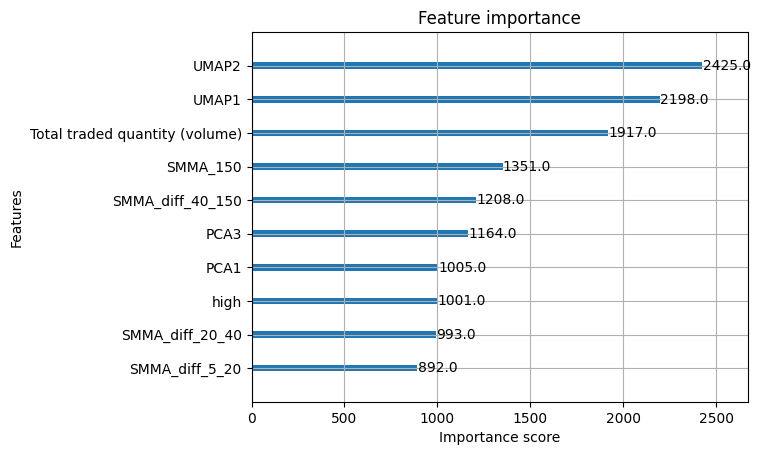

In [22]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Prepare data
X = df.drop(columns=['stock_id','date', 'target', 'Target_Return', 'Target_Movement'])
y = df['Target_Movement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize XGBoost classifier
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="multi:softmax",   # directly predict class labels
    num_class=3
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance plot
plt.figure(figsize=(10,6))
plot_importance(model, max_num_features=10)
plt.show()

In [26]:
import pandas as pd
import numpy as np

# ---------- Example Backtesting Function ----------
def backtest_strategy(df, initial_capital=100000):
    """
    df must have: ['date', 'stock_id', 'close', 'pred_price', 'pred_movement']
    """

    df = df.copy()
    df["signal"] = 0  # default hold

    # Generate trading signals
    df.loc[(df["target"] > df["close"]) & (df["Target_Movement"] == 1), "signal"] = 1   # Buy
    df.loc[(df["target"] < df["close"]) & (df["Target_Movement"] == 0), "signal"] = -1  # Sell

    # Shift signals (buy today, action tomorrow)
    df["position"] = df["signal"].shift().fillna(0)

    # Daily returns
    df["return"] = df["close"].pct_change().fillna(0)

    # Strategy returns
    df["strategy_return"] = df["position"] * df["return"]

    # Portfolio growth
    df["portfolio_value"] = initial_capital * (1 + df["strategy_return"]).cumprod()

    # Metrics
    sharpe_ratio = (df["strategy_return"].mean() / df["strategy_return"].std()) * np.sqrt(252)
    cum_return = df["portfolio_value"].iloc[-1] / initial_capital - 1
    max_drawdown = ((df["portfolio_value"].cummax() - df["portfolio_value"]) / df["portfolio_value"].cummax()).max()
    win_rate = (df["strategy_return"] > 0).mean()

    report = {
        "Cumulative Return": round(cum_return * 100, 2),
        "Sharpe Ratio": round(sharpe_ratio, 2),
        "Max Drawdown": round(max_drawdown * 100, 2),
        "Win Rate": round(win_rate * 100, 2)
    }

    return df, report


# ---------- Example Usage ----------
# Assume df_stock is your DataFrame with predictions
df_stock = pd.read_csv("/content/drive/MyDrive/NSE/angelone_historical3_NSE_EGOLD-EQ_ONE_DAY.csv")

# Run backtest
result_df, metrics = backtest_strategy(df)

print(metrics)
result_df[["date","stock_id","close","signal","portfolio_value"]].head()


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


{'Cumulative Return': np.float64(inf), 'Sharpe Ratio': np.float64(13.85), 'Max Drawdown': 0.0, 'Win Rate': np.float64(50.01)}


,date,stock_id,close,signal,portfolio_value
3607764,2014-07-15,VISAKAIND,21.98,0,100000.000000
1598098,2014-07-15,IOB,72.40,0,100000.000000
1651812,2014-07-15,HAVELLS,244.39,0,100000.000000
1621055,2014-07-15,ESABINDIA,621.35,-1,100000.000000
3726780,2014-07-15,NLCINDIA,93.25,-1,184992.355355


In [ ]:
# backtest_utils.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64
from sklearn.metrics import accuracy_score

# ---------- Metrics ----------
def cumulative_returns(series):
    return (1 + series).cumprod() - 1

def sharpe_ratio(returns, freq=252):
    """Sharpe ratio of daily returns"""
    excess_ret = returns.mean()
    sr = excess_ret / (returns.std() + 1e-12) * np.sqrt(freq)
    return sr

def max_drawdown(portfolio_values):
    """Maximum portfolio drawdown"""
    cummax = portfolio_values.cummax()
    drawdown = (portfolio_values - cummax) / cummax
    return drawdown.min()

# ---------- Backtest engine ----------
def run_vector_backtest(
    df,
    price_col="close",
    pred_price_col="pred_price",
    pred_move_col="pred_movement",
    initial_capital=100000
):
    """
    Run vectorized backtest on historical OHLCV data.

    Args:
        df: DataFrame with columns ['date','stock_id','open','high','low','close','volume',
                                    'SMMA_*', 'pred_price','pred_movement']
        price_col: price column to trade on
        pred_price_col: predicted price column
        pred_move_col: predicted movement column (0=down,1=flat,2=up)
        initial_capital: starting capital

    Returns:
        df_out: DataFrame with signals, returns, portfolio_value
        metrics: dict with performance stats
    """
    df = df.copy().sort_values(["stock_id", "date"]) if "stock_id" in df.columns else df.copy().sort_values("date")

    # Signals
    buy_sig = (df[pred_price_col] > df[price_col]) & (df[pred_move_col] == 2)
    sell_sig = (df[pred_price_col] < df[price_col]) & (df[pred_move_col] == 0)

    df["signal"] = 0
    df.loc[buy_sig, "signal"] = 1
    df.loc[sell_sig, "signal"] = -1

    # Next-day position (avoid look-ahead)
    if "stock_id" in df.columns:
        df["position"] = df.groupby("stock_id")["signal"].shift(1).fillna(0)
        df["price_return"] = df.groupby("stock_id")[price_col].pct_change().fillna(0)
    else:
        df["position"] = df["signal"].shift(1).fillna(0)
        df["price_return"] = df[price_col].pct_change().fillna(0)

    # Strategy return
    df["strategy_return"] = df["position"] * df["price_return"]

    # Portfolio aggregation
    if "stock_id" in df.columns:
        agg = (
            df.groupby("date")
            .apply(lambda g: g["strategy_return"].mean())
            .rename("daily_strategy_return")
            .reset_index()
        )
        agg["portfolio_value"] = initial_capital * (1 + agg["daily_strategy_return"]).cumprod()

        daily = agg["daily_strategy_return"]
        metrics = {
            "Cumulative Return": float(agg["portfolio_value"].iloc[-1] / initial_capital - 1),
            "Sharpe": float(sharpe_ratio(daily)),
            "Max Drawdown": float(max_drawdown(agg["portfolio_value"])),
        }
        return agg, metrics
    else:
        df["portfolio_value"] = initial_capital * (1 + df["strategy_return"]).cumprod()
        daily = df["strategy_return"]

        # Accuracy: compare signal vs next-day price move
        true_move = (df[price_col].shift(-1) > df[price_col]).astype(int)
        pred_move = (df["signal"] > 0).astype(int)

        metrics = {
            "Cumulative Return": float(df["portfolio_value"].iloc[-1] / initial_capital - 1),
            "Sharpe": float(sharpe_ratio(daily)),
            "Max Drawdown": float(max_drawdown(df["portfolio_value"])),
            "Accuracy": float(accuracy_score(true_move[:-1], pred_move[:-1])),
        }
        return df, metrics

# ---------- Trade summary ----------
def trade_summary(df):
    """Return trades, wins, losses, avg pnl, win rate."""
    df = df.copy()
    trades = []
    position = 0
    entry_price, entry_date = None, None

    for _, row in df.iterrows():
        sig, price, date = row["signal"], row["close"], row["date"]

        if sig == 1 and position == 0:
            position = 1
            entry_price, entry_date = price, date
        elif sig == -1 and position == 1:
            pnl = (price - entry_price) / entry_price
            trades.append({
                "entry_date": entry_date,
                "exit_date": date,
                "entry_price": entry_price,
                "exit_price": price,
                "pnl": pnl,
            })
            position, entry_price, entry_date = 0, None, None

    trades_df = pd.DataFrame(trades)
    if trades_df.empty:
        return {"n_trades": 0}

    wins = trades_df[trades_df["pnl"] > 0]
    stats = {
        "n_trades": len(trades_df),
        "wins": len(wins),
        "losses": len(trades_df) - len(wins),
        "win_rate": float(len(wins) / len(trades_df)),
        "avg_pnl": float(trades_df["pnl"].mean()),
    }
    return stats

# ---------- Plot ----------
def plot_to_base64(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0)
    b64 = base64.b64encode(buf.read()).decode("utf-8")
    plt.close(fig)
    return b64

def plot_portfolio(df, title="Portfolio Value"):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df["date"], df["portfolio_value"])
    ax.set_title(title)
    ax.set_xlabel("date")
    ax.set_ylabel("portfolio value")
    return plot_to_base64(fig)

metrics = trade_summary(df)
print(metrics)
